<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [151]:
import re

In [152]:
IAddress=open('lincoln-last-speech.txt','r')
IAddress.read(70)

'We meet this evening, not in sorrow, but in gladness of heart. The eva'

In [153]:
IAddress.close()

##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [159]:
vWord=[]
with open('lincoln-last-speech.txt','r') as IAddress:
    for line in IAddress:
        for word in line.split():
            w=re.sub(r'[\.\,]','', word)
            vWord.append(w.lower())
vWord[0:5]

['we', 'meet', 'this', 'evening', 'not']

##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [160]:
from nltk.corpus import stopwords
sWord=stopwords.words('english')
sWord[0:5]

['i', 'me', 'my', 'myself', 'we']

##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [161]:
cleanWord = [x for x in vWord if x not in sWord]
cleanWord[0:5]

['meet', 'evening', 'sorrow', 'gladness', 'heart']

##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

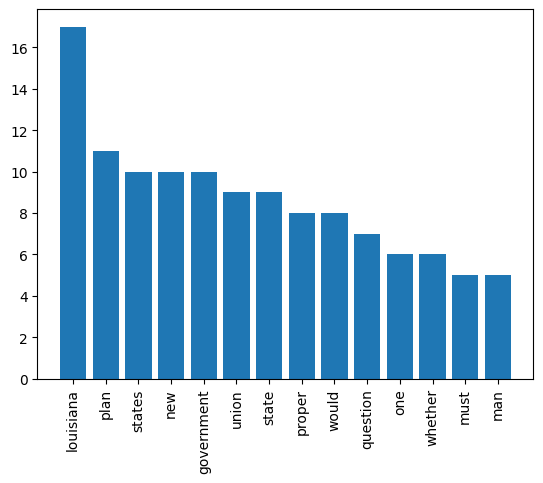

In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


maxWord=pd.value_counts(np.array(cleanWord))[0:14]
d=pd.DataFrame(maxWord)
plt.bar(d.index,d[0])
plt.xticks(rotation='vertical')
plt.show()


##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

In [20]:
import nltk
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
with open('lincoln-last-speech.txt','r') as IAddress:
        text=IAddress.read()

In [26]:
import wordcloud
from wordcloud import WordCloud

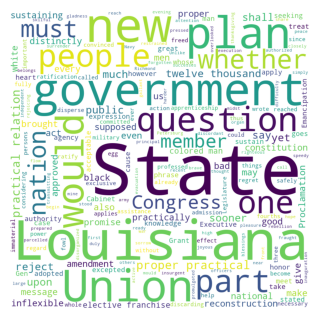

In [27]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(text)
 
plt.figure(figsize = (3, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


In [84]:
import pandas as pd
import seaborn as sns

In [2]:
flight_df=pd.read_csv('flights.csv')
flight_df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [3]:
df=flight_df[flight_df['dep_time'].isnull()].value_counts('month',normalize=True)
print(f"Highest proportion: Month {df.index[0]}")
print(f"Lowest proportion: Month {df.index[11]}")

Highest proportion: Month 2
Lowest proportion: Month 11


<AxesSubplot: xlabel='month'>

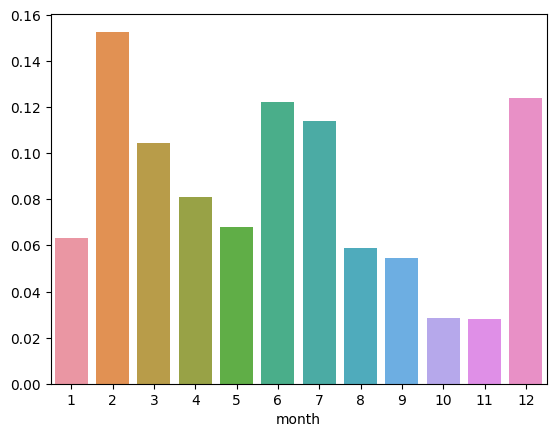

In [4]:
sns.barplot(x=df.index, y=df.values)

##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [4]:
df=flight_df[flight_df['dep_time'].isnull()]
df_2=df[df['year']==2013].value_counts('tailnum')
print(f"Plane number {df_2.index[0]} traveled the most times in 2013")

Plane number N725MQ traveled the most times in 2013


In [5]:
flight_df['Date']=flight_df[flight_df.columns[0:3]].apply(lambda x: '-'.join(x.dropna().astype(str)), axis=1)

In [74]:
flight_df['Date'] = pd.to_datetime(flight_df['Date'])
flight_df['week_of_year'] = flight_df['Date'].dt.weekofyear
flight_df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11256\10929991.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  flight_df['week_of_year'] = flight_df['Date'].dt.weekofyear


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Date,week_of_year
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,2013-01-01,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,2013-01-01,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,2013-01-01,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,2013-01-01,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,2013-01-01,1


<AxesSubplot: xlabel='week_of_year'>

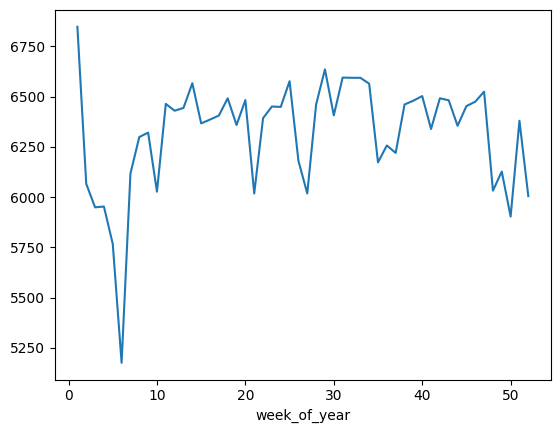

In [7]:
df_4=flight_df[flight_df['dep_time'].notnull()].groupby('week_of_year')['dep_time'].count()
sns.lineplot(x=df_4.index, y=df_4.values)

##### c) Download the plane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [ ]:
plane_df=pd.read_csv('plane.csv')

In [23]:
result=pd.merge(flight_df[flight_df['dep_time'].isnull()]['tailnum'],plane_df[['tailnum', 'year']])
result['tailnum'][result['year']==result['year'].min()].unique()

array(['N201AA', 'N567AA'], dtype=object)

In [28]:
print(f"Number of plane included: {result['tailnum'].nunique()}")

Number of plane included: 1044


##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [39]:
print(f"Number of planes without year of manufacture: {plane_df[plane_df['year'].isnull()]['tailnum'].nunique()}")

Number of planes without year of manufacture: 70


In [72]:
d=plane_df.groupby('manufacturer')['tailnum'].count().nlargest(5)
print("The five most common manufacturers:"+ str(d.index))

The five most common manufacturers:Index(['BOEING', 'AIRBUS INDUSTRIE', 'BOMBARDIER INC', 'AIRBUS', 'EMBRAER'], dtype='object', name='manufacturer')


In [86]:
m=pd.merge(flight_df[flight_df['dep_time'].isnull()][['tailnum','month']],plane_df[['tailnum', 'manufacturer']])

<AxesSubplot: xlabel='month', ylabel='manufacturer'>

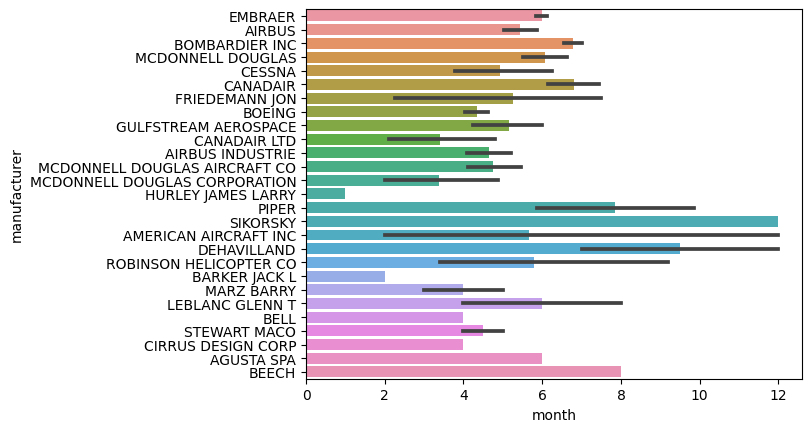

In [94]:
sns.barplot(x=m['month'], y=m['manufacturer'])

##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

In [32]:
import re

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [33]:
vText = ['google','logo','dig', 'blog', 'boogie']

In [39]:
result=[re.sub('o?go?','.',i) for i in vText] 
result

['..le', 'l.', 'di.', 'bl.', 'bo.ie']

##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [41]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']

In [46]:
result=[re.sub('^\d{5,6}$','found',i) for i in vPhone] 
result

['874', '6783', 'found', 'found', 'found', '8149674']

##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [56]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"

In [57]:
result=re.sub(r'[^a-z|\s]','',myText)
result

'you got the solution correct'

##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [58]:
myText = "Each of the three and four character words will be gone now"

In [59]:
result=re.sub(r'\b\w{3,4}\b','...',myText)
result

'... of ... three ... ... character words ... be ... ...'

##### e) Extract all the three numbers embedded in the following text.

In [60]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'

In [63]:
re.findall(r'[0-9]+',bigText)

['20', '14', '989', '500']

##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [93]:
myText = 'The salries are reported (in millions) for every company.'

In [95]:
in_para=re.findall(r'\(([^)]+)\)',myText)
words=re.findall(r'[a-z]+',in_para[0])
print(words)
print(len(words))

['in', 'millions']
2


##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [96]:
myText = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]

In [113]:
found=[re.findall(r'\_[^_]+\.', s) for s in myText]
for i in range(len(found)):
    print(found[i][0].replace('_','').replace('.',''))

bill
pay
fine-book


##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [118]:
myText = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'

In [139]:
re.findall(r'[0-9]+\s*ml|[0-9]+\s*lb',myText)

['200ml', '15 lb', '2lb']

##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [140]:
myText = 'Math symbols are $written$ in $between$ dollar $signs$'

In [147]:
found=re.findall(r'\$\w+\$',myText)
print(' '.join([found[i].strip('$') for i in range(len(found))]))
print(len(found))

written between signs
3


##### j) Extract all the valid equations in the following text.

In [149]:
myText = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'

In [150]:
re.findall(r'\d+[+*\/\-]\d+=\d+',myText)

['2+3=5', '2*3=6']